In [1]:
# 6.1.4 cont....


# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
# zip lat and lngs together
# zip object will be in memory creating a tuple with index

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# unpack lat_lngs zip object into a list
#  NOTE:  CAN ONLY UNZIP TUPLE ONCE BEFORE IT IS REMOVED FROM COMOPUTER MEMORY
#       MAKE SURE UNZIP INTO LIST BEFORE MOVING ON


# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.1.5   Generate Random World Cities

In [5]:
# USE citipy

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    # using not in to determine whether the found city is already in the
    # cities list.  If not then append to add it (to avoid duplicates)
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [8]:
# 6.2.6  Get the City Weather Data

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
# units= Imperial    standard, metric, imperial options
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters. Initialized at 1 becasue want the first iteration of 
# logging for each recorded response and set to start at 1
record_count = 1
set_count = 1

# Loop through all the cities in the list. 
# using enumerate() get index of the city for logging purposes
# city for creating an endpoint URL
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # if remainder of index divided by 50 is equal to 0
    # and if index greater than or equal to 50
    # if true then set count and record count increment by 1
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    # removing blank spaces in the city name and concat city name
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count. before the next city is processed
    record_count += 1
    
    # ADD TRY-EXCEPT TO THE RUN
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
# pass statement general purpose to handle all errors encountered and allow
# program to continue
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | tommot
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | poddorye
Processing Record 11 of Set 1 | wadi musa
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | burica
City not found. Skipping...
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | malbork
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | deputatskiy
Processing Record 22 of

Processing Record 38 of Set 4 | nagato
Processing Record 39 of Set 4 | mathbaria
Processing Record 40 of Set 4 | verkhnetulomskiy
Processing Record 41 of Set 4 | rincon
Processing Record 42 of Set 4 | bambanglipuro
Processing Record 43 of Set 4 | vryburg
Processing Record 44 of Set 4 | sao filipe
Processing Record 45 of Set 4 | buenaventura
Processing Record 46 of Set 4 | torbay
Processing Record 47 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 48 of Set 4 | kavaratti
Processing Record 49 of Set 4 | sistranda
Processing Record 50 of Set 4 | kadykchan
City not found. Skipping...
Processing Record 1 of Set 5 | udachnyy
Processing Record 2 of Set 5 | halalo
City not found. Skipping...
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | kanniyakumari
Processing Record 5 of Set 5 | egvekinot
Processing Record 6 of Set 5 | clyde river
Processing Record 7 of Set 5 | da lat
Processing Record 8 of Set 5 | cravo

Processing Record 24 of Set 8 | terra rica
Processing Record 25 of Set 8 | akyab
Processing Record 26 of Set 8 | humberto de campos
Processing Record 27 of Set 8 | ilulissat
Processing Record 28 of Set 8 | mindelo
Processing Record 29 of Set 8 | qasigiannguit
Processing Record 30 of Set 8 | maarianhamina
Processing Record 31 of Set 8 | cairns
Processing Record 32 of Set 8 | hofn
Processing Record 33 of Set 8 | houston
Processing Record 34 of Set 8 | sorong
Processing Record 35 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 36 of Set 8 | sterling
Processing Record 37 of Set 8 | chokurdakh
Processing Record 38 of Set 8 | sioux lookout
Processing Record 39 of Set 8 | mumford
Processing Record 40 of Set 8 | passos
Processing Record 41 of Set 8 | laukaa
Processing Record 42 of Set 8 | itaueira
Processing Record 43 of Set 8 | sinnamary
Processing Record 44 of Set 8 | lakes entrance
Processing Record 45 of Set 8 | tual
Processing Record 46 of Set 8 | dehui
Process

Processing Record 12 of Set 12 | mudgee
Processing Record 13 of Set 12 | pacasmayo
Processing Record 14 of Set 12 | colonia
Processing Record 15 of Set 12 | roman
Processing Record 16 of Set 12 | oktyabrskoye
Processing Record 17 of Set 12 | haines junction
Processing Record 18 of Set 12 | quipama
Processing Record 19 of Set 12 | santa barbara
Processing Record 20 of Set 12 | birjand
Processing Record 21 of Set 12 | mercedes
Processing Record 22 of Set 12 | morro da fumaca
Processing Record 23 of Set 12 | brus
Processing Record 24 of Set 12 | moerai
Processing Record 25 of Set 12 | phan rang
City not found. Skipping...
Processing Record 26 of Set 12 | havelock
Processing Record 27 of Set 12 | steenwijk
Processing Record 28 of Set 12 | tubruq
City not found. Skipping...
Processing Record 29 of Set 12 | singaparna
Processing Record 30 of Set 12 | maneadero
Processing Record 31 of Set 12 | blagoyevo
Processing Record 32 of Set 12 | nizhneudinsk
Processing Record 33 of Set 12 | lucea
Proce

In [13]:
# how many rows of data did we just spit out

len(city_data)

554

In [14]:
# 6.2.7 Create a DataFrame of City Wx Data

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
# city_data was just created above
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sitka,57.0531,-135.3300,55.29,88,75,0.00,US,2021-08-03 14:48:20
1,Port Alfred,-33.5906,26.8910,71.55,47,0,6.22,ZA,2021-08-03 14:48:21
2,Mataura,-46.1927,168.8643,35.47,98,14,2.68,NZ,2021-08-03 14:48:21
3,Saint-Philippe,-21.3585,55.7679,69.39,61,2,10.63,RE,2021-08-03 14:48:21
4,Atuona,-9.8000,-139.0333,77.31,73,82,22.08,PF,2021-08-03 14:48:22
5,Busselton,-33.6500,115.3333,49.08,75,89,3.91,AU,2021-08-03 14:48:22
6,Tommot,58.9564,126.2925,61.14,93,92,3.83,RU,2021-08-03 14:48:22
7,Cape Town,-33.9258,18.4232,66.27,69,0,9.22,ZA,2021-08-03 14:48:23
8,Poddorye,57.4695,31.1156,67.50,57,40,10.36,RU,2021-08-03 14:48:23
9,Wadi Musa,30.3222,35.4793,86.94,16,0,11.05,JO,2021-08-03 14:48:23


In [16]:
# put columns in the right order

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                    "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sitka,US,2021-08-03 14:48:20,57.0531,-135.3300,55.29,88,75,0.00
1,Port Alfred,ZA,2021-08-03 14:48:21,-33.5906,26.8910,71.55,47,0,6.22
2,Mataura,NZ,2021-08-03 14:48:21,-46.1927,168.8643,35.47,98,14,2.68
3,Saint-Philippe,RE,2021-08-03 14:48:21,-21.3585,55.7679,69.39,61,2,10.63
4,Atuona,PF,2021-08-03 14:48:22,-9.8000,-139.0333,77.31,73,82,22.08
5,Busselton,AU,2021-08-03 14:48:22,-33.6500,115.3333,49.08,75,89,3.91
6,Tommot,RU,2021-08-03 14:48:22,58.9564,126.2925,61.14,93,92,3.83
7,Cape Town,ZA,2021-08-03 14:48:23,-33.9258,18.4232,66.27,69,0,9.22
8,Poddorye,RU,2021-08-03 14:48:23,57.4695,31.1156,67.50,57,40,10.36
9,Wadi Musa,JO,2021-08-03 14:48:23,30.3222,35.4793,86.94,16,0,11.05


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
# with index label (or column A) header of City_ID
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# 6.3.1   Plot latitude vs Temp

# need lats, max temps, humidity, cloudiness, wind speed

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# use time module from standard Python library

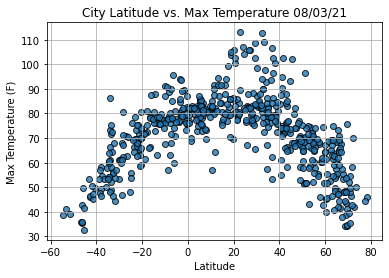

In [21]:
#  SCATTER PLOT MAX TEMP

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
# marker is circles, transparency 0.8
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# use time and format with .strftime() so ouput standard vs. all seconds
# time.time would be all in seconds
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [22]:
# 6.3.2  Plot Latitude vs Humidity

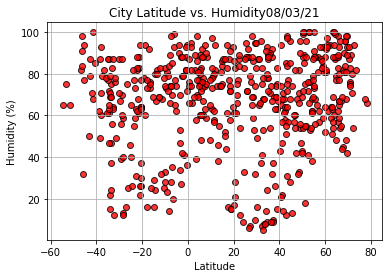

In [25]:
#  SCATTER PLOT HUMIDITY

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
# marker is circles, transparency 0.8
plt.scatter(lats,
            humidity,
            color = "red",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# use time and format with .strftime() so ouput standard vs. all seconds
# time.time would be all in seconds
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

In [26]:
# 6.3.3 Plot Latitude vs Cloudiness

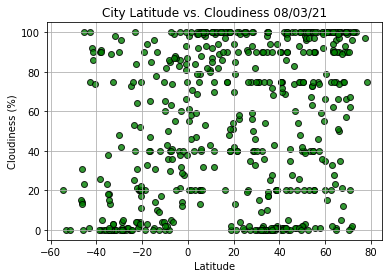

In [27]:
#  SCATTER PLOT CLOUDINESS

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
# marker is circles, transparency 0.8
plt.scatter(lats,
            cloudiness,
            color="green",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# use time and format with .strftime() so ouput standard vs. all seconds
# time.time would be all in seconds
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [28]:
# 6.3.4 Plot Latitude vs Wind Speed

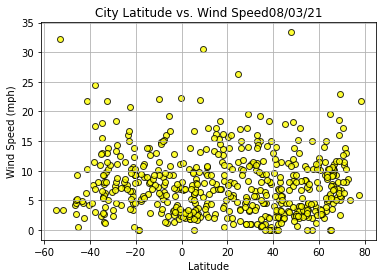

In [29]:
#  SCATTER PLOT WIND SPEED

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
# marker is circles, transparency 0.8
plt.scatter(lats,
            wind_speed,
            color="yellow",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# use time and format with .strftime() so ouput standard vs. all seconds
# time.time would be all in seconds
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()